# Example workflow

In this tutorial we will go through the usual workflow for the usage of 🔴`multibind`🔴. We will demonstrate the dataloading, the training of the model and the analysis of the obtained results. For that purpose we will use 🔴a SELEX dataset🔴. The process is very similar for the other datatypes which are covered and some more information can be found in the next tutorial about the models.

In [1]:
import multibind as mb
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '../../../annotations'
import torch
import torch.utils.data as tdata

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Using device: cpu


## Data Loading

First, we need to load the data.

In [2]:
data = mb.bindome.datasets.ProBound.ctcf(flank_length=0)
data

,seq,0,1
0,AAAAAAAGCCCGGAAATAGGCAACTTGTAG,0,1
1,AAAAAAAGGATGTTCCTAGCAACTTATAAA,1,0
2,AAAAAACAACGATAACCAACTGCTGCCGGA,0,1
3,AAAAAACACATGTATGAGTTTTTGATGGAG,1,0
4,AAAAAACCCTCCTTGGTGTCGGACGGCTAT,0,1
...,...,...,...
120091,TTTTTTTTCTTCATTGTTACAGTAGGTAGC,1,0
120092,TTTTTTTTGACTGCTTGGCTGGCTCCTGTG,1,0
120093,TTTTTTTTGGTCGGATTCGCTGTTGTTCAC,0,1
120094,TTTTTTTTTGAACCGGCCGCTCCTATGATC,1,0


In [3]:
dataset = mb.datasets.SelexDataset(data, n_rounds=1)
train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)

## Training

We create and train the model with the training routine `mb.tl.train_iterative()`. This method creates a suitable model based on the given dataset. Hences it is important to use the correct class too store the data.

next w 15 <class 'int'>
# rounds 1
# batches 1
# enr_series True

Kernel to optimize 0

Freezing kernels
setting grad status of kernel at 0 to 1
setting grad status of kernel at 1 to 0


before kernel optimization.


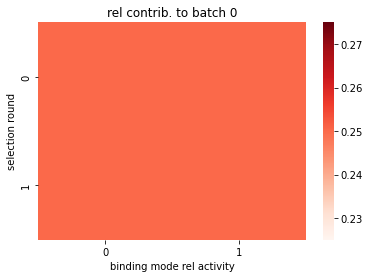


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


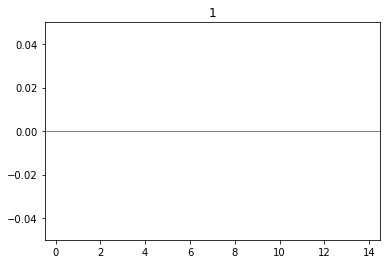

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


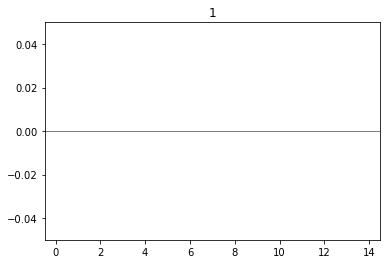

kernels mask None
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 500 early_stopping 50
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 51, Loss: 0.843954 , best epoch: 36 secs per epoch: 2.922 s
Epoch: 87, Loss: 0.8439 , best epoch: 36 secs per epoch: 2.850 s
early stop!
total time: 245.104 s
secs per epoch: 2.850 s

##After kernel opt / before shift optim.


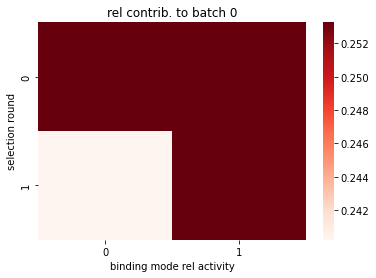


#activities
[[[1.0000235  0.94846195]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 2.4382, -2.4382]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


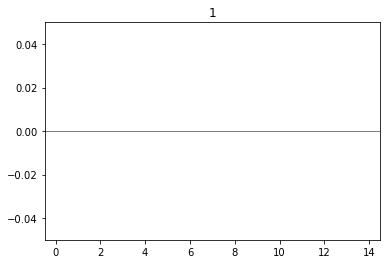

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


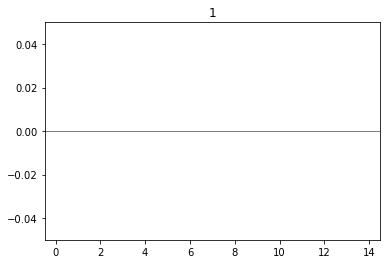

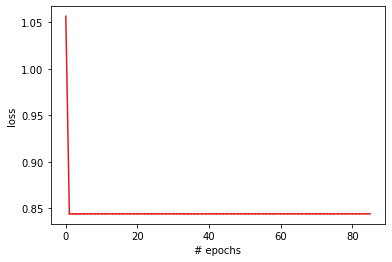

after shift optimz model


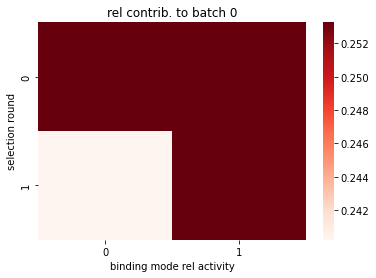


#activities
[[[1.0000235  0.94846195]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 2.4382, -2.4382]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


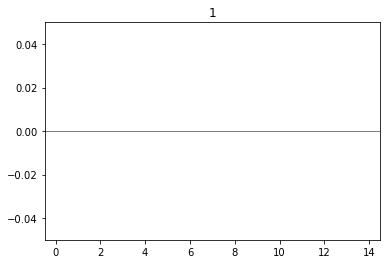

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


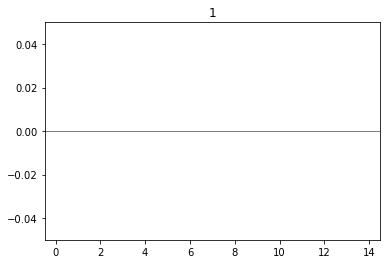

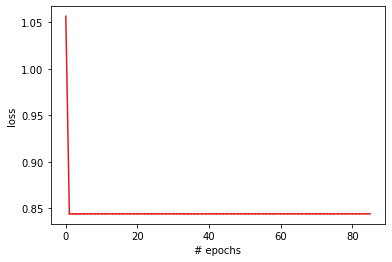



Kernel to optimize 1

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 1


before kernel optimization.


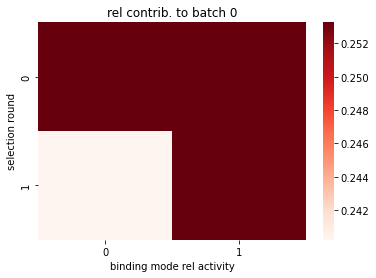


#activities
[[[1.0000235  0.94846195]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 2.4382, -2.4382]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


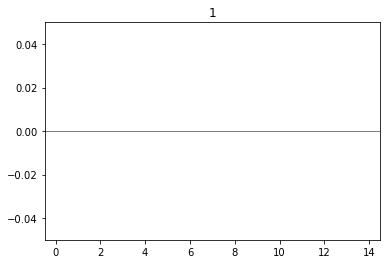

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


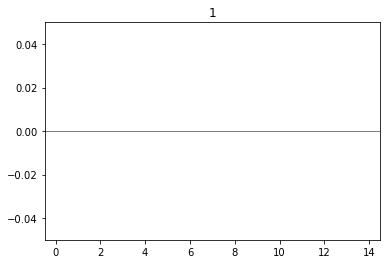

kernels mask None
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 500 early_stopping 50
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 51, Loss: 0.830001 , best epoch: 30 secs per epoch: 3.899 s
Epoch: 101, Loss: 0.830119 , best epoch: 60 secs per epoch: 3.778 s
Epoch: 111, Loss: 0.8302 , best epoch: 60 secs per epoch: 3.786 s
early stop!
total time: 416.418 s
secs per epoch: 3.786 s

##After kernel opt / before shift optim.


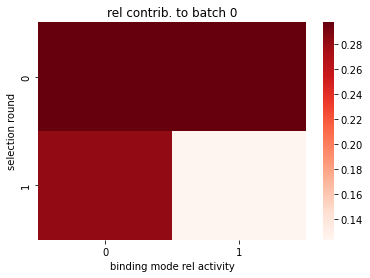


#activities
[[[1.0000235  0.94846195]
  [1.0001833  0.41662374]]]

#log_etas
Parameter containing:
tensor([[ 0.9883, -0.9883]], requires_grad=True)


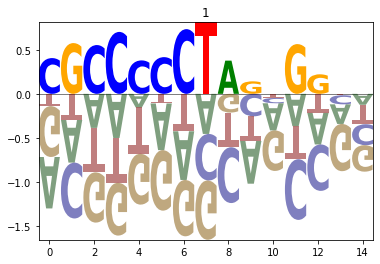

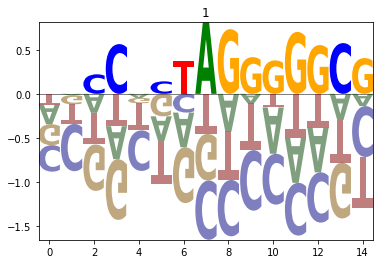

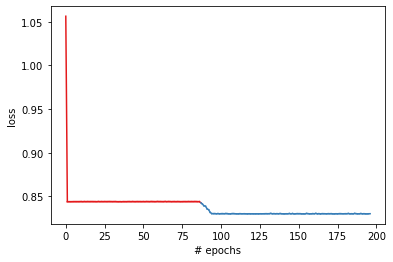


optimize_motif_shift (first)...
next expand left: 1, next expand right: 1, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 500 early_stopping 50
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 51, Loss: 0.829205 , best epoch: 36 secs per epoch: 1.624 s
Epoch: 101, Loss: 0.829358 , best epoch: 86 secs per epoch: 1.626 s
Epoch: 151, Loss: 0.829174 , best epoch: 103 secs per epoch: 1.606 s
Epoch: 154, Loss: 0.8291 , best epoch: 103 secs per epoch: 1.606 s
early stop!
total time: 245.671 s
secs per epoch: 1.606 s
after opt.

#activities
[[[1.0000235  0.94846195]
  [0.99958974 0.43328255]]]

#log_etas
Parameter containing:
tensor([[ 0.9139, -0.9139]], requires_grad=True)


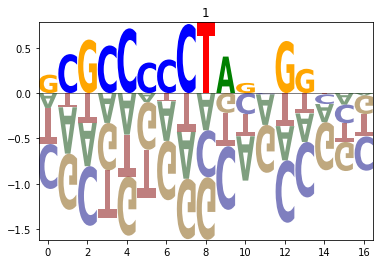

next expand left: 1, next expand right: 2, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 500 early_stopping 50
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 51, Loss: 0.829220 , best epoch: 43 secs per epoch: 1.629 s
Epoch: 101, Loss: 0.828982 , best epoch: 65 secs per epoch: 1.615 s
Epoch: 116, Loss: 0.8290 , best epoch: 65 secs per epoch: 1.611 s
early stop!
total time: 185.262 s
secs per epoch: 1.611 s
after opt.

#activities
[[[1.0000235  0.94846195]
  [0.9998767  0.45916256]]]

#log_etas
Parameter containing:
tensor([[ 0.8991, -0.8991]], requires_grad=True)


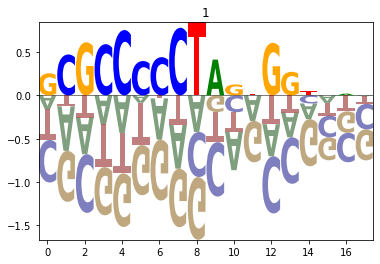

next expand left: 2, next expand right: 1, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 500 early_stopping 50
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 51, Loss: 0.828609 , best epoch: 33 secs per epoch: 1.640 s
Epoch: 84, Loss: 0.8287 , best epoch: 33 secs per epoch: 1.639 s
early stop!
total time: 136.021 s
secs per epoch: 1.639 s
after opt.

#activities
[[[1.0000235  0.94846195]
  [1.0001354  0.45076254]]]

#log_etas
Parameter containing:
tensor([[ 0.8938, -0.8938]], requires_grad=True)


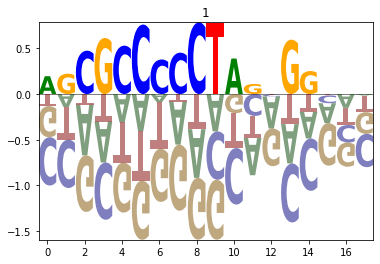

next expand left: 2, next expand right: 2, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 500 early_stopping 50
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 51, Loss: 0.828510 , best epoch: 47 secs per epoch: 1.692 s
Epoch: 98, Loss: 0.8286 , best epoch: 47 secs per epoch: 1.671 s
early stop!
total time: 162.046 s
secs per epoch: 1.671 s
after opt.

#activities
[[[1.0000235  0.94846195]
  [1.000815   0.46185404]]]

#log_etas
Parameter containing:
tensor([[ 0.8838, -0.8838]], requires_grad=True)


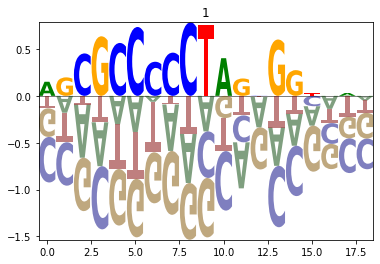

sorted
   expand.left  expand.right  shift      loss
0            2             2      0  0.828269
1            2             1      0  0.828413
2            1             2      0  0.828809
3            1             1      0  0.828964
4            0             0      0  0.829834
action: (2, 2, 0)


optimize_motif_shift (again)...
sorted
   expand.left  expand.right  shift      loss
0            0             0      0  0.828269
action: (0, 0, 0)


optimize_motif_shift (first)...
sorted
   expand.left  expand.right  shift      loss
0            0             0      0  0.828269
action: (0, 0, 0)

after shift optimz model


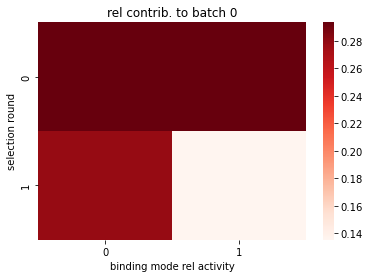


#activities
[[[1.0000235  0.94846195]
  [1.000815   0.46185404]]]

#log_etas
Parameter containing:
tensor([[ 0.8838, -0.8838]], requires_grad=True)


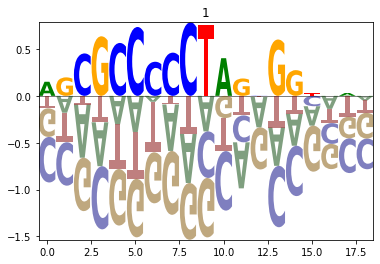

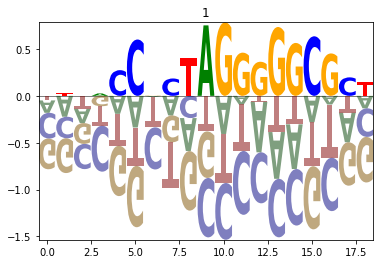

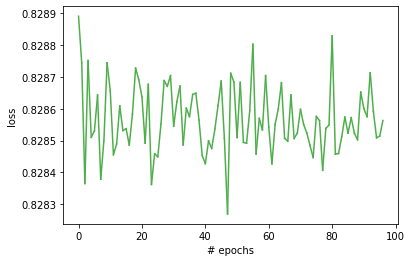




final refinement step (after shift)...

unfreezing all layers for final refinement
kernel grad (0) = 1 
kernel grad (1) = 1 

kernels mask None
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 500 early_stopping 50
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 51, Loss: 0.828657 , best epoch: 9 secs per epoch: 1.714 s
Epoch: 60, Loss: 0.8286 , best epoch: 9 secs per epoch: 1.707 s
early stop!
total time: 100.705 s
secs per epoch: 1.707 s

##final motif signal (after final refinement)


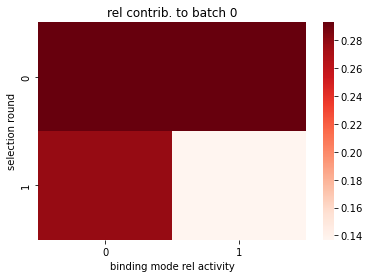


#activities
[[[1.0000235  0.94846195]
  [0.99997294 0.46766797]]]

#log_etas
Parameter containing:
tensor([[ 0.9027, -0.9027]], requires_grad=True)


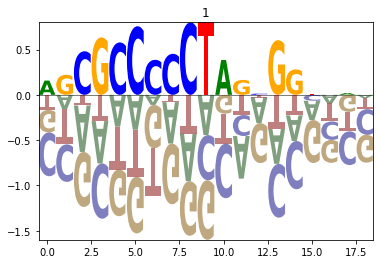

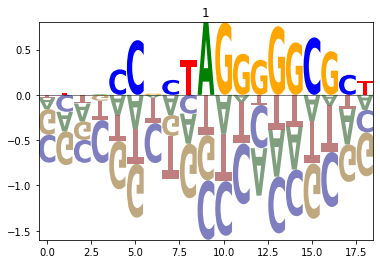

best loss 0.8283172058298233


In [4]:
model, best_loss = mb.tl.train_iterative(train, device, n_kernels=2, num_epochs=500,
                                         early_stopping=50, log_each=50, show_logo=True)

## Evaluation

First, it can be interesting to look at the loss history of the model.

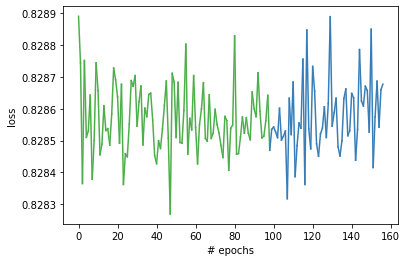

In [5]:
mb.pl.plot_loss(model)

Secondly, we can plot the final binding mode.


#activities
[[[1.0000235  0.94846195]
  [0.99997294 0.46766797]]]

#log_etas
Parameter containing:
tensor([[ 0.9027, -0.9027]], requires_grad=True)


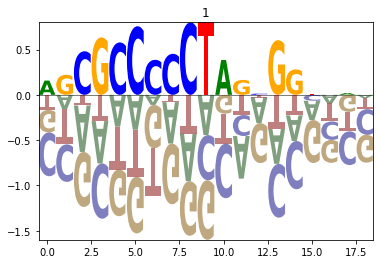

In [6]:
mb.pl.conv_mono(model)

Thirdly, the goodness of fit of the model is evaluated based on the predictions about the enrichment of k-mers.

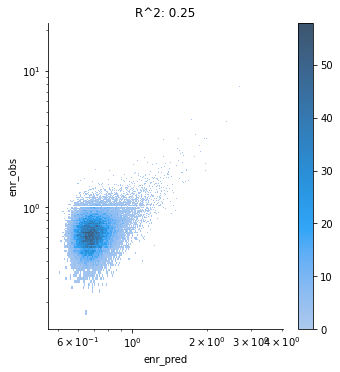

0.24625435156719677

In [7]:
mb.pl.kmer_enrichment(model, train)

The $R^2$ value which is also computed by the statement above is an indication of that goodness of fit.

If we were using PBM data, it would not make sense to calculate a kmer enrichment. Instead, we would directly compute the $R^2$ values of the predictions, listing them per protein in each case.